# Description

Spectogram is the visual representation of how frequency contents of signal evolve along with time. It is the most important feature while training a machine learning model for audio processing tasks.

To extract spectograms from raw audio, we use a tool called Short Time Fourier Transform (STFT). STFT is basically Fast Fourier Transform where we apply FFT to various segments of the sampled raw audio called frames. Due to this, we get information about both frequency (through the Fourier Transform) as well as time (through the frames we used). This allows us to plot a heatmap that represents how a frequency evolves over time.

# Packages

In [1]:
import os
import librosa
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

# Let's start

### Loading audios

In [4]:
scale_file = "../raw audio/scale.wav"
debussy_file = "../raw audio/debussy.wav"
redhot_file = "../raw audio/redhot.wav"
duke_file = "../raw audio/duke.wav"

In [5]:
ipd.Audio(scale_file)

In [4]:
scale, sr = librosa.load(scale_file)
debussy, _ = librosa.load(debussy_file)
redhot, _ = librosa.load(redhot_file)
duke, _ = librosa.load(duke_file)

### Short Time Fourier Transform (STFT)

In [6]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [9]:
S_scale = librosa.stft(scale, n_fft=FRAME_SIZE, hop_length=HOP_SIZE) 


In [11]:
S_scale.shape # should be a 2D array with len(freq_bins) x len(frames) since each frame is FFted by each discrete frequency

(1025, 342)

In [14]:
(S_scale[0][0]) # Fourier transform coefficient of 1st frame transformed by first discrete frequency

np.complex64(2.4644842+0j)

### Calculating spectograms

In [15]:
Y_scale = np.abs(S_scale)**2 # squared magnitude of all the fourier coeffs

In [17]:
type(Y_scale[0][0]) # squared magnitude of the above complex number

numpy.float32

### Plotting spectograms

In [18]:
def plot_spectogram(Y, sr, hop_length, y_axis = "linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, sr=sr, hop_length=hop_length, x_axis="time", y_axis=y_axis)
    plt.colorbar(format="%+2.f")

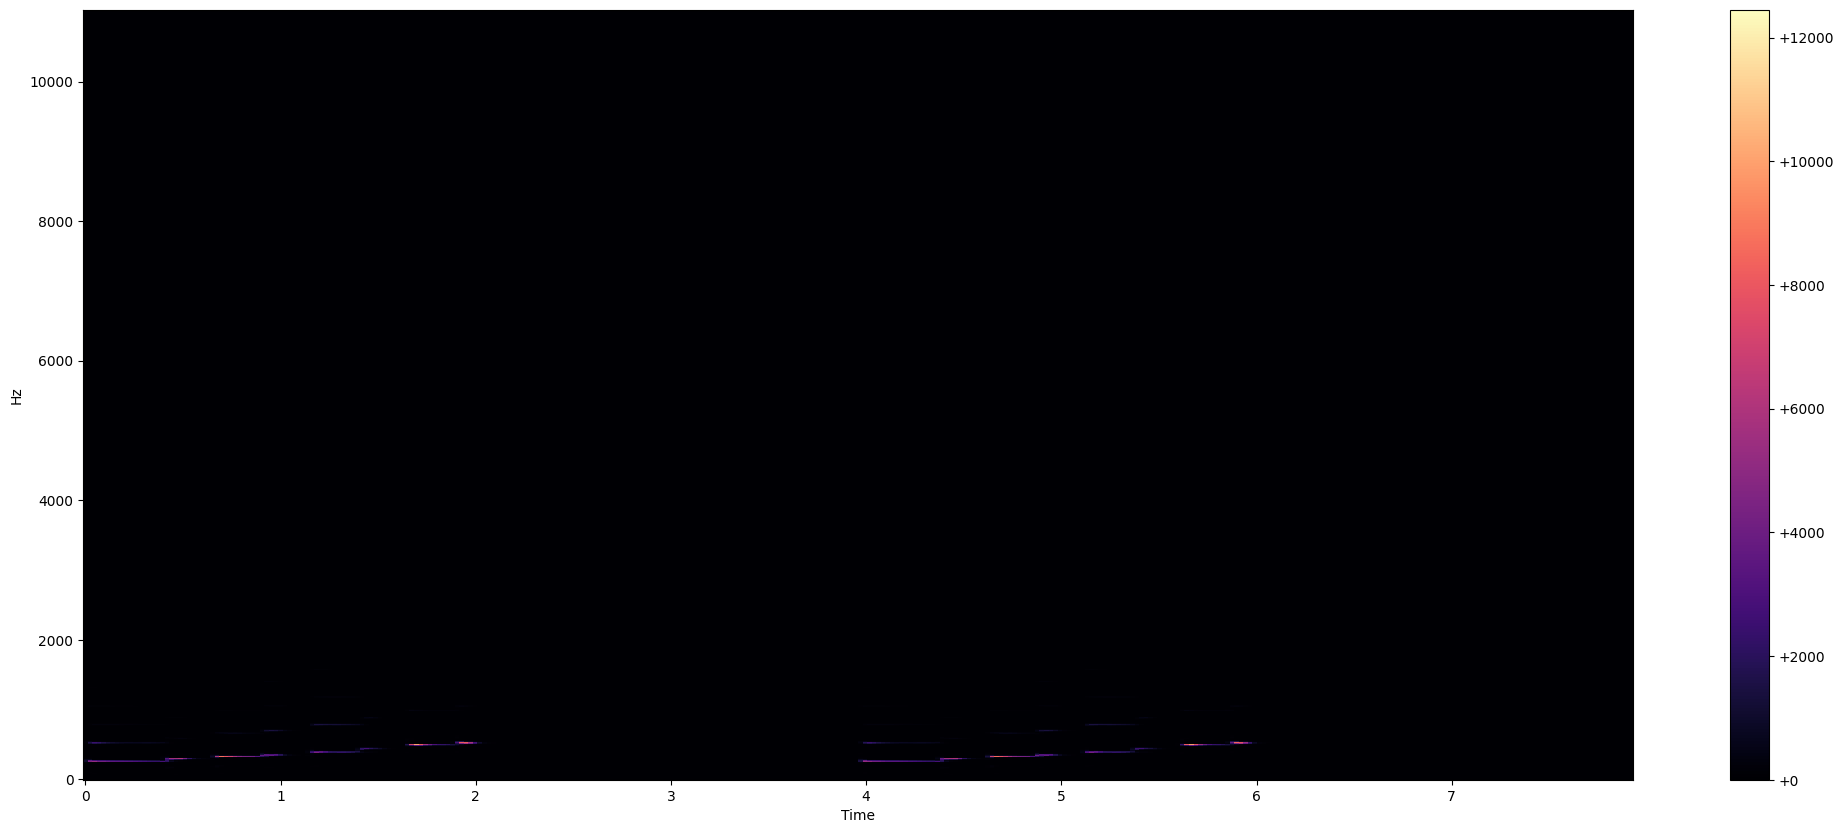

In [19]:
plot_spectogram(Y=Y_scale, sr=sr, hop_length=HOP_SIZE) # oh fu

#### Log Amplitude Spectogram (Amplitude scaled by log)

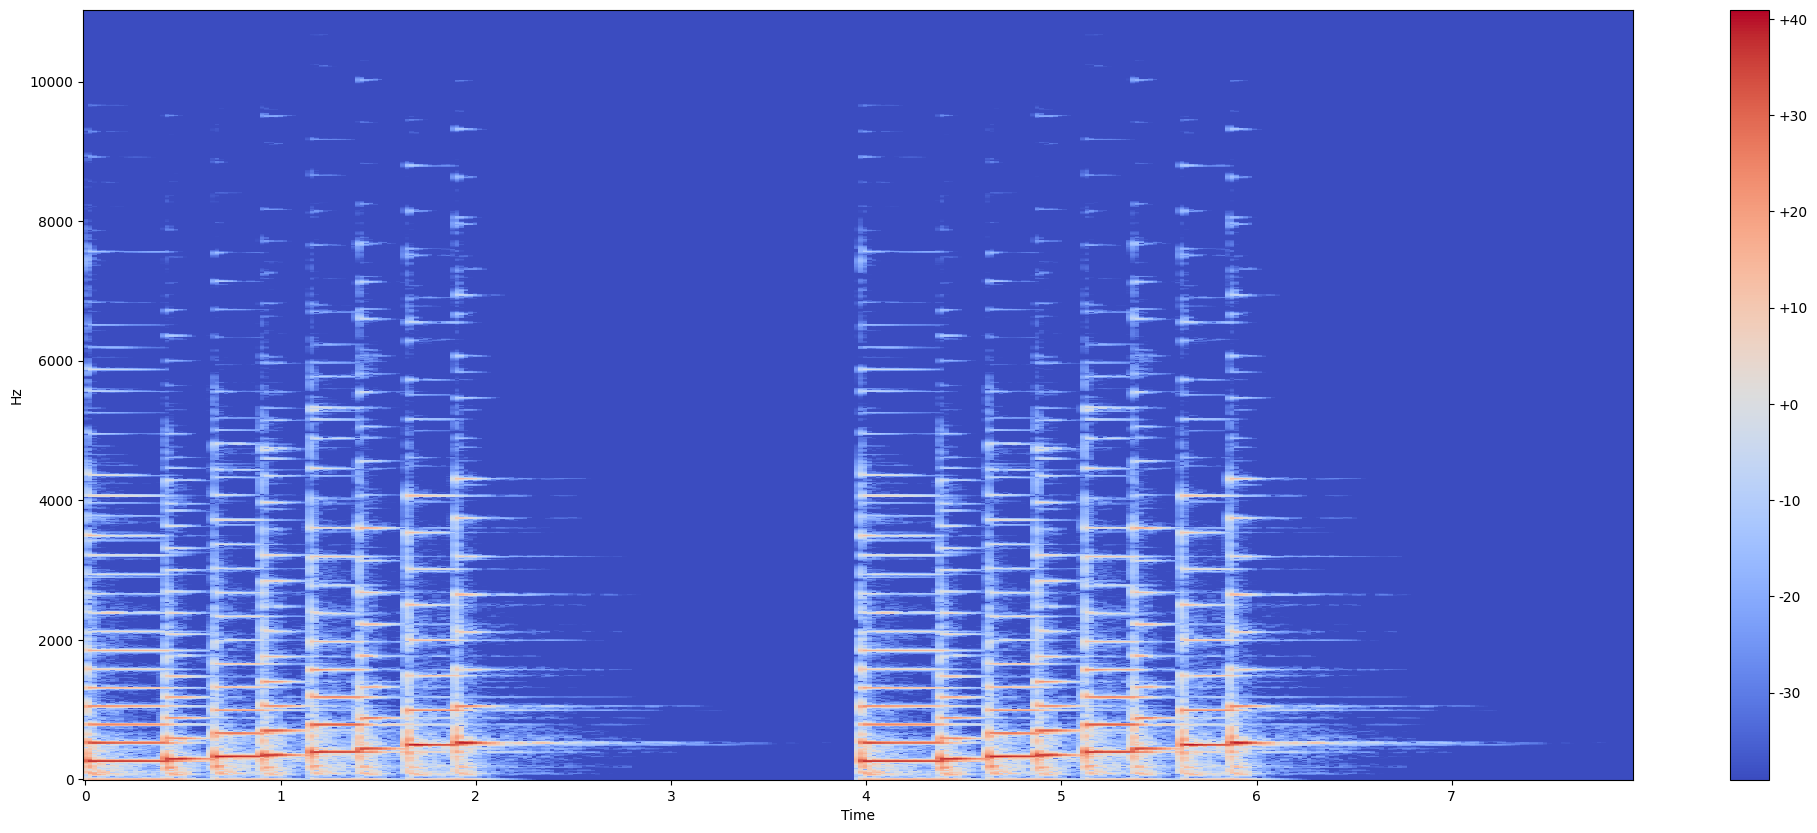

In [22]:
y_log_scale = librosa.power_to_db(Y_scale)
plot_spectogram(Y=y_log_scale, sr=sr, hop_length=HOP_SIZE) # transforming the Y to decibels

#### Log Frequency Spectogram (Frequency axis scaled by log)

Here, we clearly visualize a plot that shows the C5 - B5 notes. Notice the high energy at 256 Hz. This actually corresponds to the C5 note of piano. Then, we can see frequency rising with time since we move from C5 to D5, E5 and so on.

We can also notice the energy at 512 Hz. This corresponds to the harmonics of the C5 notes.

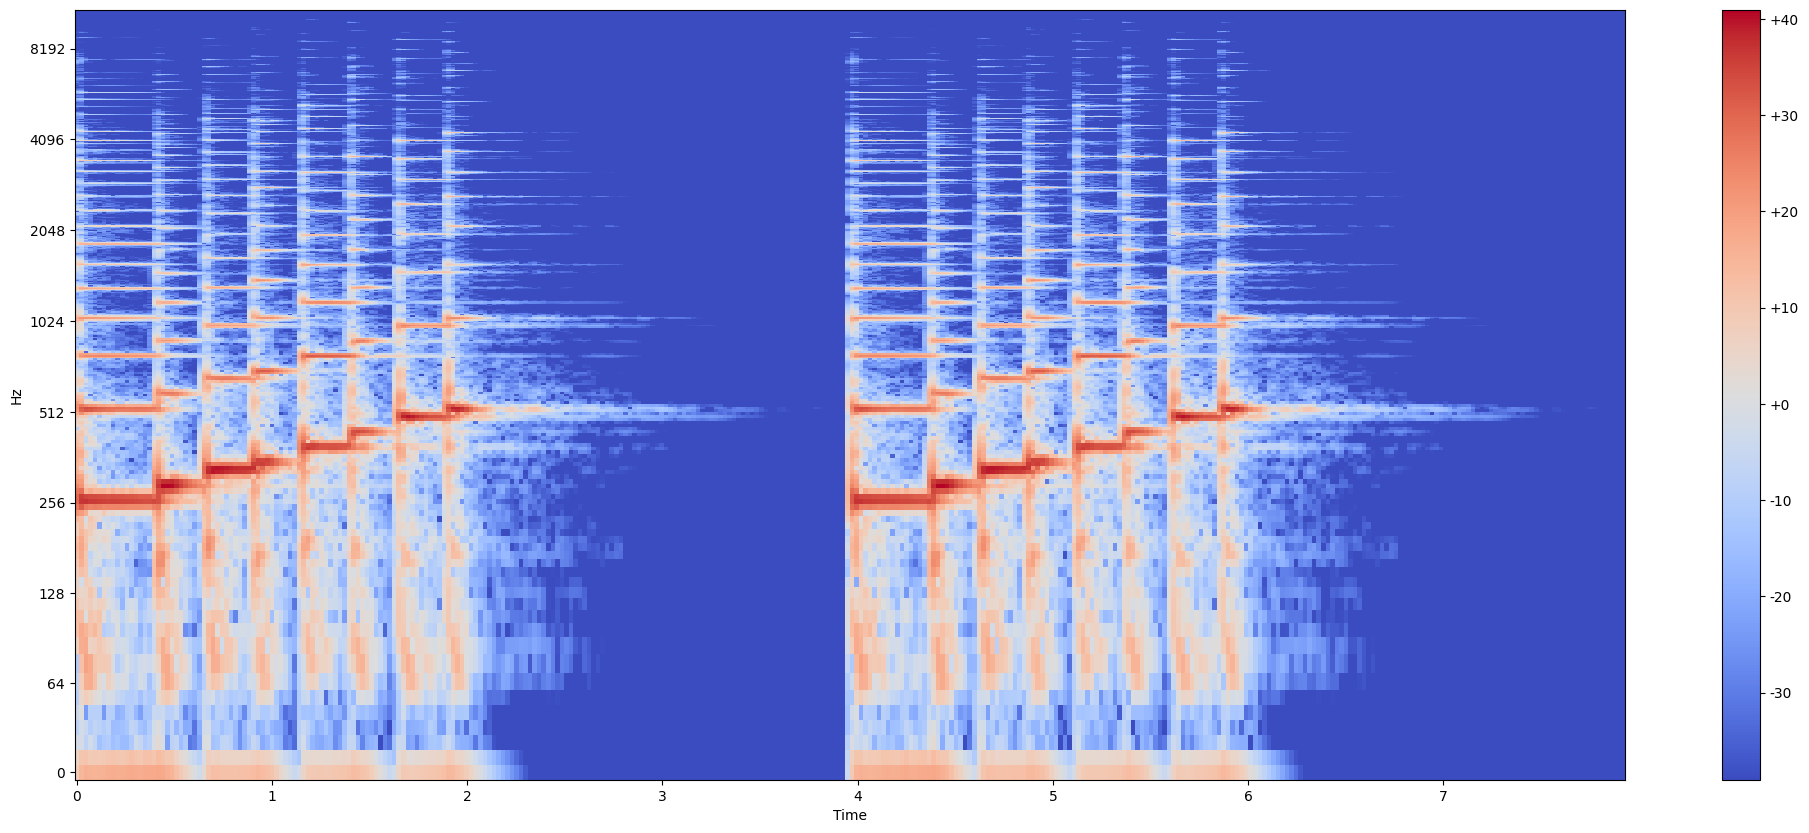

In [24]:
plot_spectogram(y_log_scale, sr, hop_length=HOP_SIZE, y_axis="log")

### Visualizing songs from different genres

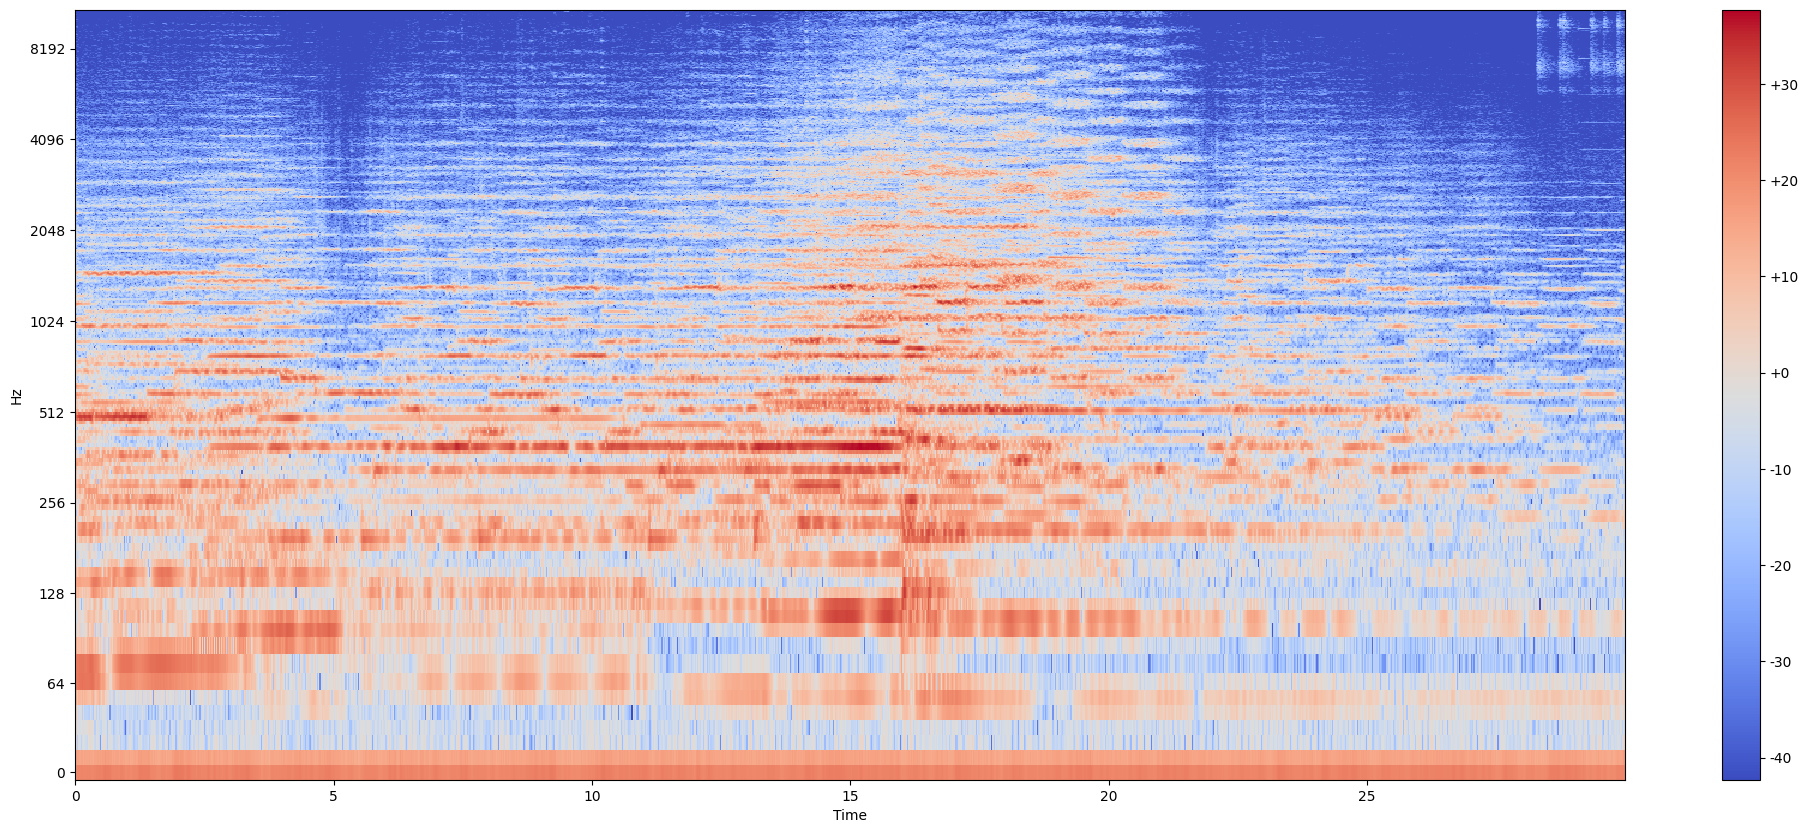

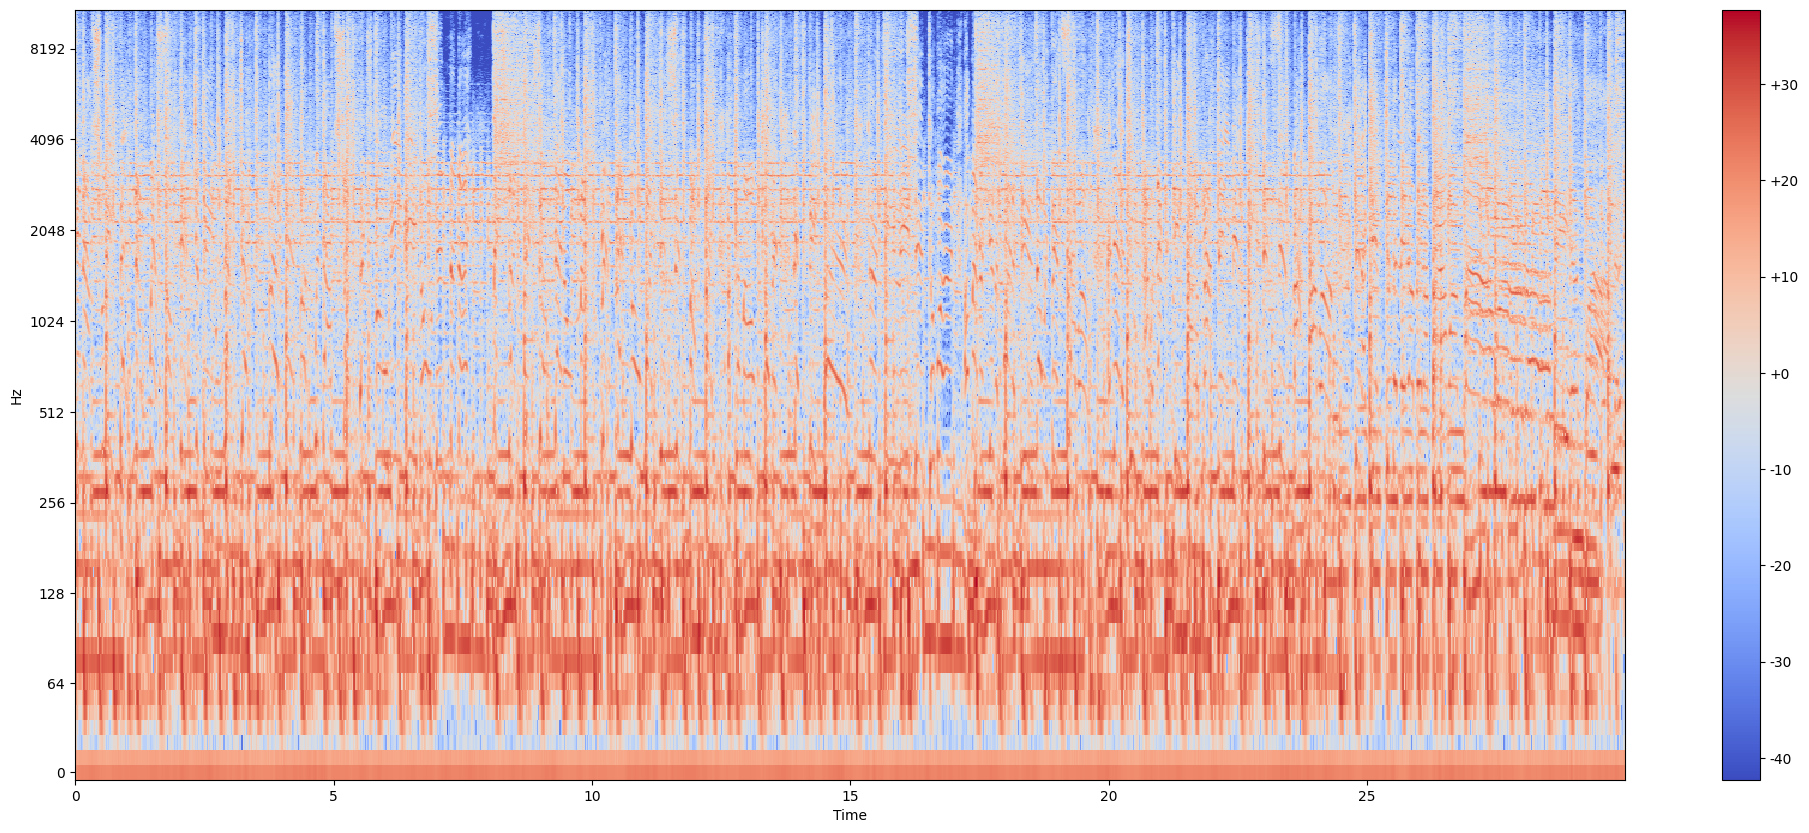

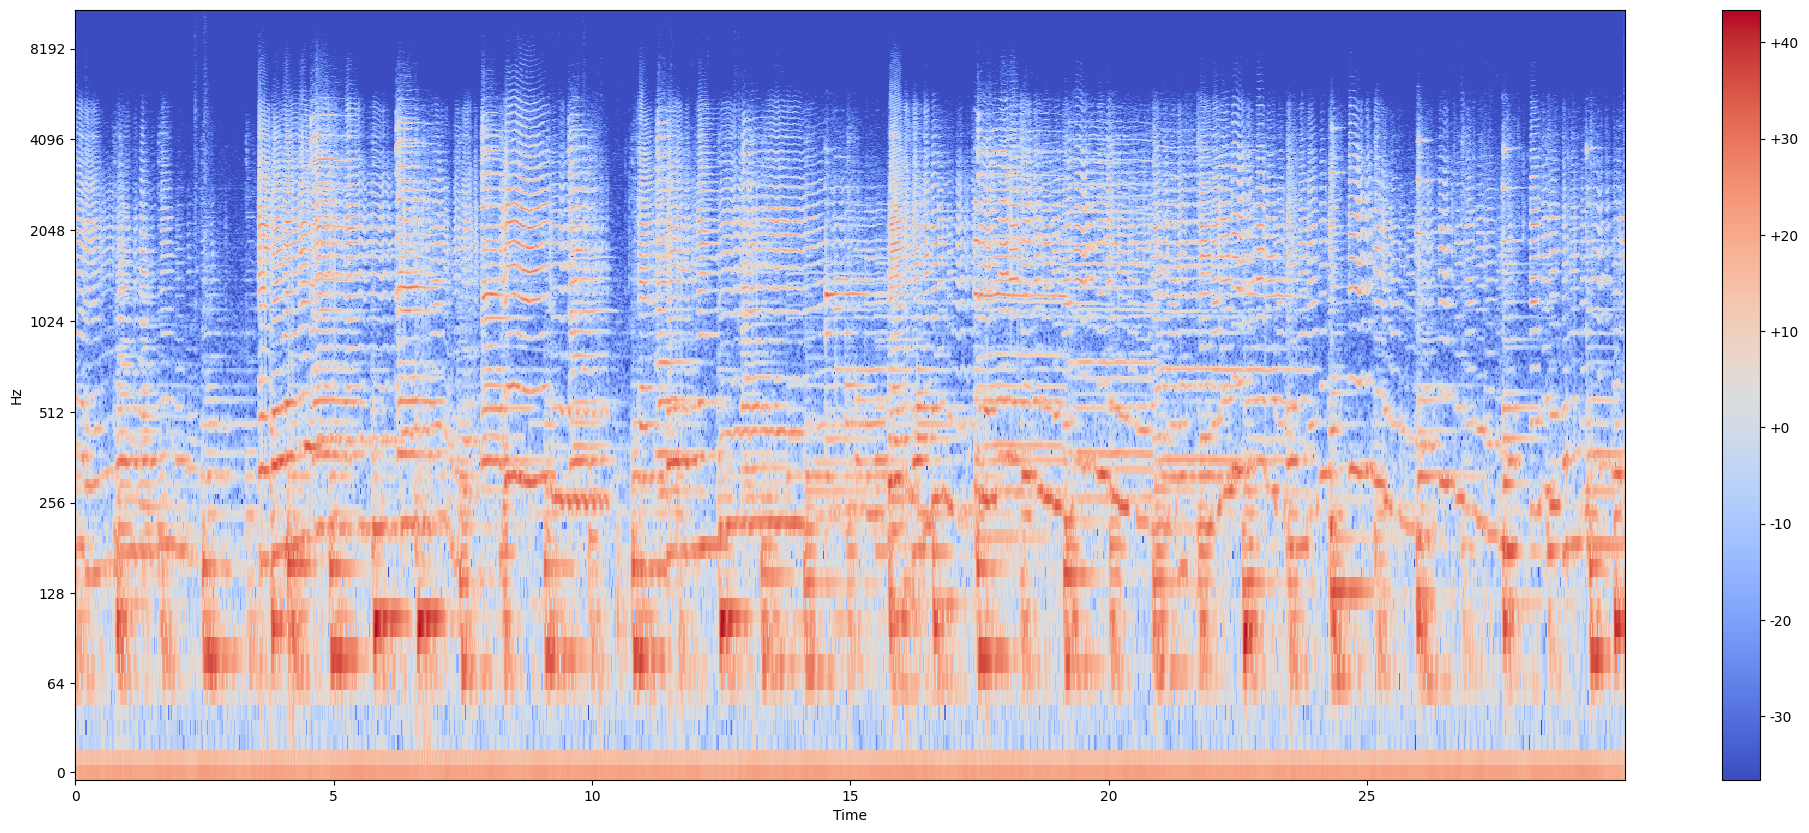

In [25]:
S_debussy = librosa.stft(debussy, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_redhot= librosa.stft(redhot, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_duke = librosa.stft(duke, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

Y_debussy = librosa.power_to_db(np.abs(S_debussy)**2)
Y_redhot = librosa.power_to_db(np.abs(S_redhot)**2)
Y_duke= librosa.power_to_db(np.abs(S_duke)**2)

plot_spectogram(Y_debussy, sr, HOP_SIZE, y_axis="log") # orchestral
plot_spectogram(Y_redhot, sr, HOP_SIZE, y_axis="log") # rock
plot_spectogram(Y_duke, sr, HOP_SIZE, y_axis="log") # jazz